# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [111]:
print('Tobias Conran Zorzetto' + ' 166214')
print('Victor Costa Dominguite' + ' 245003')

Tobias Conran Zorzetto 166214
Victor Costa Dominguite 245003


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv('heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

In [113]:
from scipy import stats

# Rows with missing values are removed from the dataset
df = df.dropna(axis=0)

# Dealing with categorical variables by replacing them with numerical values
df['anaemia'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['diabetes'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['smoking'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['sex'].replace(['Female', 'Male'], [0, 1], inplace=True)
df = df.astype('float64')

# Calculates the Z-score and only keeps rows within 3 standard deviations of its
# mean to avoid outliers
df = df[(np.abs(stats.zscore(df)) < 3)]
df = df.dropna(axis=0)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.0,1.9,130.0,0.0,0.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.0,1.3,129.0,0.0,1.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.0,1.9,137.0,0.0,0.0,1.0
5,90.0,1.0,47.0,0.0,40.0,1.0,204000.0,2.1,132.0,0.0,1.0,1.0
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.0,1.2,137.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0.0,582.0,1.0,55.0,0.0,543000.0,1.0,132.0,1.0,0.0,0.0
289,90.0,1.0,337.0,0.0,38.0,0.0,390000.0,0.9,144.0,1.0,0.0,0.0
290,45.0,0.0,615.0,1.0,55.0,0.0,222000.0,0.8,141.0,1.0,0.0,0.0
293,63.0,1.0,103.0,1.0,35.0,0.0,179000.0,0.9,136.0,0.0,1.0,0.0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [114]:
from sklearn.model_selection import train_test_split

my_seed = 42

# Selecting target value and dropping unwanted columns

y = df["serum_creatinine"] 
X = df[df.columns.drop(["DEATH_EVENT"])]

# Splitting data into train, test and validation sets
X_train, X_test = train_test_split(X,test_size = 0.3, random_state = my_seed)
X_test, X_valid = train_test_split(X_test, test_size = 0.3, random_state = my_seed)


# Normalizing the dataset (Z-normalization)
mean = X_train.mean()
stddev = X_train.std()

X_train=(X_train-mean)/(stddev)
y_train= X_train["serum_creatinine"]
X_train = X_train[X_train.columns.drop(["serum_creatinine"])]

X_test=(X_test-mean)/(stddev)
y_test= X_test["serum_creatinine"]
X_test = X_test[X_test.columns.drop(["serum_creatinine"])]

X_valid=(X_valid-mean)/(stddev)
y_valid= X_valid["serum_creatinine"]
X_valid = X_valid[X_valid.columns.drop(["serum_creatinine"])]

X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_sodium,sex,smoking
184,-0.275623,1.108037,-0.601574,-0.773592,-1.097586,-0.801179,-0.420499,0.103996,-0.719812,1.300804
179,-0.526036,-0.897510,0.739516,-0.773592,0.179716,-0.801179,0.292708,0.922398,-0.719812,1.300804
213,-1.110333,1.108037,-0.628784,1.285529,-0.671818,1.241264,-0.123330,-1.805610,1.381575,-0.764508
108,0.141731,-0.897510,0.935821,-0.773592,0.009409,-0.801179,0.589878,-0.987207,-0.719812,1.300804
282,-1.611159,-0.897510,-0.759006,-0.773592,-0.671818,-0.801179,-0.468047,-2.351211,-0.719812,1.300804
...,...,...,...,...,...,...,...,...,...,...
25,1.560738,-0.897510,-0.595743,1.285529,0.009409,-0.801179,-1.252575,2.013601,-0.719812,1.300804
206,-1.778101,1.108037,-0.687093,-0.773592,0.179716,-0.801179,-0.337292,1.195199,1.381575,-0.764508
81,0.475615,-0.897510,0.247783,-0.773592,1.031251,-0.801179,0.106775,0.103996,-0.719812,1.300804
119,2.061563,-0.897510,0.247783,-0.773592,0.009409,-0.801179,0.106775,-0.714406,1.381575,-0.764508


### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [115]:
from sklearn.feature_selection import mutual_info_regression

# Feature selection.
correlation = mutual_info_regression(X_train, y_train, random_state= my_seed)
idx = np.array([]).astype(int)
for i in range(len(correlation)):
    if correlation[i] <= 0.02:
        idx = np.append(idx, i)

# Columns with low correlation are dropped
X_train = X_train.drop(X_train.columns[idx], axis = 1)
X_test = X_test.drop(X_test.columns[idx], axis = 1)
X_valid = X_valid.drop(X_valid.columns[idx], axis = 1)
X_train


,age,ejection_fraction,platelets,serum_sodium,sex,smoking
184,-0.275623,-1.097586,-0.420499,0.103996,-0.719812,1.300804
179,-0.526036,0.179716,0.292708,0.922398,-0.719812,1.300804
213,-1.110333,-0.671818,-0.123330,-1.805610,1.381575,-0.764508
108,0.141731,0.009409,0.589878,-0.987207,-0.719812,1.300804
282,-1.611159,-0.671818,-0.468047,-2.351211,-0.719812,1.300804
...,...,...,...,...,...,...
25,1.560738,0.009409,-1.252575,2.013601,-0.719812,1.300804
206,-1.778101,0.179716,-0.337292,1.195199,1.381575,-0.764508
81,0.475615,1.031251,0.106775,0.103996,-0.719812,1.300804
119,2.061563,0.009409,0.106775,-0.714406,1.381575,-0.764508


> What are the conclusions? (1-2 paragraphs)

Analisando a correlação entre o valor alvo e as features, constata-se que há algumas features cujo valor aparentam não influenciar, ou têm uma influência muito baixa no valor objetivo. Com isso, é razoável eliminar essas features de baixa correlação para que elas não sejam levadas em consideração no treinamento do modelo. 

Esse procedimento de feature selection pode ser benéfico, pois, dessa forma, serão ponderadas apenas as features de maior impacto na predição do valor alvo, o que, a princípio deve levar a um resultado mais preciso e coerente. Além disso, o próprio processo de treinamento se torna mais eficiente, uma vez que há uma diminuição no volume de dados a ser analisado.

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [116]:
def MSE(Y,H):
  e = (Y - H) ** 2
  e = np.sum(e)
  return e / Y.size

In [117]:
class LinearRegression():
  def __init__(self, learning_rate=0.01, max_iter=1000):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None
    self.tolerance        = 1e-5
    self.cost             = None

  def predict(self, X):
    pred = np.array([])
    for x in X.to_numpy():
      pred = np.append(pred, self.bias + np.sum((self.weights * x)))
    return pred

  def fit(self, X, y):
    # Initialize vector to save the costs
    costs = np.array([]) 
    # Initializes weights, bias and current cost
    if self.weights == None:
      self.weights = np.array([0.0 for _ in range(X.shape[1])]).astype(np.float64)
    if self.bias == None:
      self.bias = 0.0
    if self.cost == None:
      self.cost = MSE(y, self.predict(X))
    prediction = self.predict(X)
      
    # Loop for updating weights and bias
    for _ in range(self.max_iter):
      self.bias = self.bias - (self.learning_rate * (1/y.size) * np.sum(prediction - y))
      for i in range(len(self.weights)):
        self.weights[i] = self.weights[i] - (self.learning_rate * (1/y.size) * np.sum((prediction - y) * (X.to_numpy())[:,i]))

      prediction = self.predict(X)

      # If the difference between current error and previous error is lower 
      # than the tolerance then the algorithm can stop
      if abs(MSE(y, prediction) - self.cost) < self.tolerance:
        break
      # If MSE starts to increase, it has already surpassed its lowest point
      if MSE(y, prediction) > self.cost:
        break
      else:
        self.cost = MSE(y, prediction)
        costs = np.append(costs, self.cost)
    return self.weights, costs
  
# Create linear regression object

model = LinearRegression(learning_rate=0.02, max_iter=1000)

# Train the model using the training set

costs = model.fit(X_train, y_train)[1]

# Resulting MSE
print(f"On training set: MSE = {round(MSE(y_train, model.predict(X_train)), 3)}")

print(f"On test set: MSE = {round(MSE(y_test, model.predict(X_test)), 3)}")

# The obtained weights during training
print("(w0 = %2.3f" % model.bias, end = "")
for i in range(X_train.shape[1]):
    print(",\n w%d = %2.3f" % (i+1, model.weights[i]), end = "")
print(")")

On training set: MSE = 0.801
On test set: MSE = 1.045
(w0 = 0.000,
 w1 = 0.212,
 w2 = -0.162,
 w3 = -0.027,
 w4 = -0.291,
 w5 = -0.030,
 w6 = 0.010)


In [118]:
from sklearn.linear_model import SGDRegressor

scikit_model = SGDRegressor(random_state=42)
scikit_model.fit(X_train, y_train)
y_pred_train = scikit_model.predict(X_train)
y_pred_test = scikit_model.predict(X_test)

print(f"On training set: MSE = {round(MSE(y_train, y_pred_train),3)}")
print(f"On test set: MSE = {round(MSE(y_test, y_pred_test),3)}")

print("(w0 = %2.3f" % scikit_model.intercept_, end = "")
for i in range(X_train.shape[1]):
    print(",\n w%d = %2.3f" % (i+1, scikit_model.coef_[i]), end = "")
print(")")


On training set: MSE = 0.801
On test set: MSE = 1.046
(w0 = 0.002,
 w1 = 0.215,
 w2 = -0.163,
 w3 = -0.025,
 w4 = -0.292,
 w5 = -0.028,
 w6 = 0.011)


> What are the conclusions? (1-2 paragraphs)

O procedimento adotado na implementação da Regressão Linear consistiu na atualização dos pesos pela fórmula da derivada parcial em relação a cada peso (conforme o modelo apresentado em aula do algoritmo padrão do Gradiente Descendente). Isso fez com que o treinamento se tornasse mais lento, especialmente quando comparado com a velocidade do Stochastic Gradient Descent do scikit-learn. Por outro lado, o modelo implementado apresenta a vantagem de sempre apresentar os mesmos resultados com consistência, uma vez que não depende de fatores aleatórios, como é o caso do Stochastic Gradient Descent.

Em relação aos resultados, temos que o erro (MSE) de ambas soluções foram muito semelhantes. Os pesos (```w0``` a ```w6```) obtidos também estão relativamente próximos um do outro, o que indica uma consistência entre as duas soluções, além de fornecer uma certa validação para o modelo implementado manualmente. Além disso, os valores de MSE para o treinamento e teste estão relativamente próximos, o que indica uma coerência do modelo treinado.

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

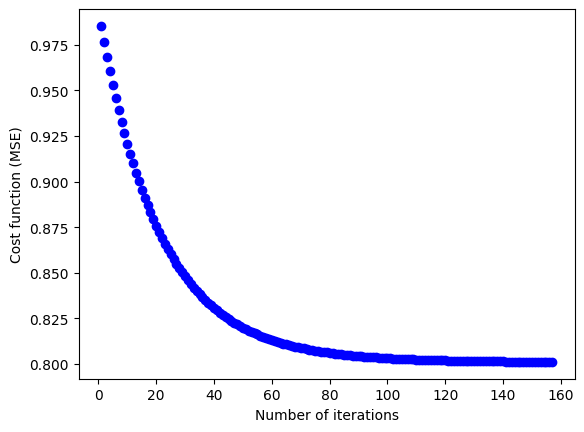

In [119]:
iterations = np.array([x+1 for x in range(costs.size)])
plt.scatter(iterations, costs, color = "blue")
plt.ylabel("Cost function (MSE)")
plt.xlabel("Number of iterations")
plt.xticks()
plt.yticks()
plt.show()


> What are the conclusions? (1-2 paragraphs)

Nas primeiras iterações, observa-se que a queda no MSE entre uma iteração e a seguinte é mais significativa. Conforme se aumenta o número de iterações, as variações do MSE se tornam mais sutis, até o ponto em que há praticamente uma estabilização de seus valores. A estabilização do MSE indica que a Regressão Linear não obterá resultados muito melhores para os pesos, mesmo que continue executando por um maior período de tempo e, portanto, a solução obtida será uma das mais próximas possível da solução ótima, sem um grande aumento do custo computacional.

De maneira geral, o comportamento da função custo (MSE) em função do número de iterações do algoritmo apresenta uma forma parecida com a de uma exponencial fracionária (como $e^{1/x}$). Isso parece indicar um funcionamento adequado do modelo, o qual tende a convergir para um menor valor de MSE conforme avançam as iterações.

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [120]:
# Different learning rates. Using scikit-learn libraries.
learning_rates = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10])
errors = np.array([])

for rate in learning_rates:
    scikit_model = SGDRegressor(learning_rate='constant', eta0=rate, random_state=42)
    scikit_model.fit(X_train, y_train)
    y_pred = scikit_model.predict(X_valid)
    errors = np.append(errors, MSE(y_valid, y_pred))

print("Using scikit-learn SGDRegressor model")
for i in range(len(learning_rates)):
    print(f"Learning rate: {learning_rates[i]}\t\tMSE = {round(errors[i], 4)}")

Using scikit-learn SGDRegressor model
Learning rate: 0.01		MSE = 1.6813
Learning rate: 0.02		MSE = 1.6846
Learning rate: 0.05		MSE = 1.4942
Learning rate: 0.1		MSE = 1.5745
Learning rate: 0.2		MSE = 1.8417
Learning rate: 0.5		MSE = 6.042785257253157e+24
Learning rate: 1.0		MSE = 1.589562861859573e+25
Learning rate: 2.0		MSE = 3.6879694464160613e+25
Learning rate: 5.0		MSE = 6.624569196352351e+26
Learning rate: 10.0		MSE = 3.3363838150051264e+27


In [121]:
# Different learning rates. Using model implemented by us.
errors = np.array([])

for rate in learning_rates:
    model = LinearRegression(learning_rate=rate, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    errors = np.append(errors, MSE(y_valid, y_pred))

print("Using self implemented Linear Regression")
for i in range(len(learning_rates)):
    print(f"Learning rate: {learning_rates[i]}\t\tMSE = {round(errors[i], 4)}")

Using self implemented Linear Regression
Learning rate: 0.01		MSE = 1.6561
Learning rate: 0.02		MSE = 1.6583
Learning rate: 0.05		MSE = 1.6606
Learning rate: 0.1		MSE = 1.6619
Learning rate: 0.2		MSE = 1.6632
Learning rate: 0.5		MSE = 1.6651
Learning rate: 1.0		MSE = 1.6658
Learning rate: 2.0		MSE = 2.4494
Learning rate: 5.0		MSE = 7.4235
Learning rate: 10.0		MSE = 25.6144


> What are the conclusions? (1-2 paragraphs)

Para taxas de aprendizado mais baixas, entre 0.01 e 0.5, há uma certa consistência nos erros obtidos, os quais se mantêm próximos a 0.08. Esses resultados indicam um bom funcionamento dos modelos para essas menores taxas de aprendizados. Porém, conforme se aumenta a taxa de aprendizado para valores acima de 0.5, observa-se um aumento no MSE resultante, especialmente utilizando o ```SGDRegressor``` do scikit-learn, enquanto para o modelo implementado manualmente, um aumento mais significativo no MSE é observado para taxas de aprendizado a partir de 5.

Assim, com essas maiores taxas, é notável que os modelos deixam de funcionar de maneira desejável, passando a apresentar erros consideravelmente grandes. Esse fato muito possivelmente é resultado de overshooting. De maneira geral, esse procedimento de validação permite com que haja um ajuste dos hiperparâmetros, mais especificamente da taxa de aprendizado, para que o treinamento do modelo apresente um melhor desempenho.

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [122]:
from sklearn.preprocessing import PolynomialFeatures

degrees = np.array([x+1 for x in range(15)])

best_deg = degrees[0]
best_mse = None

for deg in degrees:
    pol_features = PolynomialFeatures(degree=deg)
    X_train_pol = pol_features.fit_transform(X_train)

    model = SGDRegressor(random_state=42)
    model.fit(X_train_pol, y_train)

    X_valid_pol = pol_features.fit_transform(X_valid)

    y_pred_pol = model.predict(X_valid_pol)
    
    current_mse = MSE(y_valid, y_pred_pol)

    if (best_mse is None or current_mse < best_mse):
        best_mse = current_mse
        best_deg = deg

print(f"Best results with degree {best_deg} (MSE = {best_mse})")


Best results with degree 2 (MSE = 1.4537589763547782)


> What are the conclusions? (1-2 paragraphs)

Foram realizadas regressões lineares ajustando os dados a polinômios de graus 1 a 15, buscando o que fornecesse o menor erro (MSE) no conjunto de validação. Esse procedimento é realizado com a intenção de encontrar o modelo que melhor se ajusta aos dados reais e não somente aos dados do conjunto de treinamento. Ao utilizar o conjunto de validação para selecionar o grau do polinômio que melhor se adequa aos dados, busca-se evitar a ocorrência de overfitting, ou seja, a escolha de um polinômio que se ajusta muito bem ao conjunto de treinamento, mas não ao conjunto total de dados.

Com isso, o polinômio de grau 4 foi o que apresentou o menor MSE dentre os polinômios testados e, portanto, corresponde ao melhor resultado obtido.

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

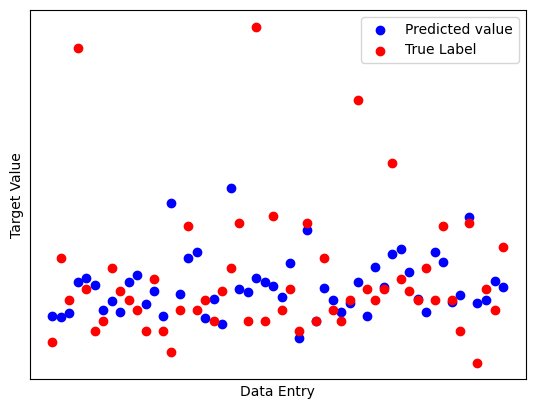

In [123]:
# The plot shows the true label (red) and the predict label (blue)
# for each data entry in the test set

pol_features = PolynomialFeatures(degree=best_deg)
X_train_pol = pol_features.fit_transform(X_train)

model = SGDRegressor(random_state=42)
model.fit(X_train_pol, y_train)

X_test_pol = pol_features.fit_transform(X_test)

y_pred = model.predict(X_test_pol)

num = np.array([x+1 for x in range(y_pred.size)])
plt.scatter(num, y_pred, color = "blue", label="Predicted value")
plt.scatter(num, y_test, color = "red", label="True Label")
plt.ylabel("Target Value")
plt.xlabel("Data Entry")
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [124]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test = train_test_split(df, test_size = 0.4, random_state = my_seed)
X_test, X_valid = train_test_split(X_test, test_size = 0.5, random_state = my_seed)

y_train= X_train["DEATH_EVENT"]
X_train = X_train[X_train.columns.drop(["DEATH_EVENT"])]

y_test= X_test["DEATH_EVENT"]
X_test = X_test[X_test.columns.drop(["DEATH_EVENT"])]

y_valid= X_valid["DEATH_EVENT"]
X_valid = X_valid[X_valid.columns.drop(["DEATH_EVENT"])]

# Feature selection.
correlation = mutual_info_classif(X_train, y_train, random_state= my_seed)
idx = np.array([]).astype(int)
for i in range(len(correlation)):
    if correlation[i] <= 0.02:
        idx = np.append(idx, i)

# Columns with low correlation are dropped
X_train = X_train.drop(X_train.columns[idx], axis = 1)
X_test = X_test.drop(X_test.columns[idx], axis = 1)
X_valid = X_valid.drop(X_valid.columns[idx], axis = 1)

# Normalizing the dataset
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

> What are the conclusions? (1-2 paragraphs)

Nessa etapa, houve a divisão do conjunto de dados apenas entre treinamento e teste. Já em relação à normalização dos dados, foi utilizada a classe StandardScaler, a qual foi aplicada individualmente em cada conjunto, para que o teste não fosse contaminado pelo treinamento.

O procedimento de feature selection foi realizado com o auxílio da função ```mutual_info_classif``` do scikit learn. A partir dessa, obteve-se uma estimativa da correlação entre o valor alvo e cada uma das features. Assim, aquelas que apresentaram uma correlação menor que 0.02, segundo o resultado obtido pelo ```mutual_info_classif```, foram desconsideradas no treinamento do modelo.

2. (2 points) Perform Multinomial Logistic Regression.

In [125]:
from sklearn import linear_model
from sklearn.metrics import log_loss, accuracy_score
import seaborn as sn    

# Validation for selecting hyperparameters

C_candidates = [0.1, 0.5, 1, 2, 5, 10, 20]

best_C = None
best_accuracy = 0

for c in C_candidates:
    model = linear_model.LogisticRegression(C=c, random_state=my_seed, multi_class='multinomial', solver='saga')
    model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    if (accuracy_score(y_valid, y_pred_valid) >= best_accuracy):
        best_C = c
        best_accuracy = accuracy_score(y_valid, y_pred_valid)

# Train the model using the training set and the hyperparameters determined during validation
model = linear_model.LogisticRegression(C=best_C, random_state=my_seed, multi_class='multinomial', solver='saga')

model.fit(X_train, y_train)

print('\nOn training set:')
y_pred_train = model.predict(X_train)
print("Cross entropy: %.2f" % log_loss(y_train, y_pred_train))
print("Accuracy: %.2f" % accuracy_score(y_train, y_pred_train))
print('\nOn testing set:')
y_pred_test = model.predict(X_test)
print("Cross entropy: %.2f" % log_loss(y_test, y_pred_test))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_test))



On training set:
Cross entropy: 6.74
Accuracy: 0.81

On testing set:
Cross entropy: 13.86
Accuracy: 0.62


> What are the conclusions? (1-2 paragraphs)


Para realizar a Regressão Logística Multinomial, o modelo foi treinado passando os parâmetros ```multi_class='multinomial'``` e ```solver='saga'``` para o LogisticRegression do sklearn. Além disso, foi realizado o procedimento de validação para determinar a melhor constante de regularização ```C``` a ser utilizada no modelo treinado.

Os resultados obtidos apresentaram uma acurácia de 81% para o conjunto de treinamento e 62% para o conjunto de teste. Assim, os valores de acurácia resultante indicam um desempenho razoável do modelo treinado, sendo que há a previsão correta para quase mais da metade dos casos.

3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [126]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=my_seed)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
model = linear_model.LogisticRegression(C = best_C, random_state=my_seed, multi_class='multinomial', solver='saga')
# Train the model using the training set
model.fit(X_train_over, y_train_over)

print('\nOn training set:')
y_pred_over_train = model.predict(X_train_over)
print("Cross entropy: %.2f" % log_loss(y_train_over, y_pred_over_train))
print("Accuracy: %.2f" % accuracy_score(y_train_over, y_pred_over_train))
print('\nOn testing set:')
y_pred_over_test = model.predict(X_test)
print("Cross entropy: %.2f" % log_loss(y_test, y_pred_over_test))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_over_test))


On training set:
Cross entropy: 6.74
Accuracy: 0.81

On testing set:
Cross entropy: 13.17
Accuracy: 0.63


In [127]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=my_seed)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

model = linear_model.LogisticRegression(C = best_C, random_state=my_seed, multi_class='multinomial', solver='saga')

# Train the model using the training set
model.fit(X_train_under, y_train_under)

print('\nOn training set:')
y_pred_under_train = model.predict(X_train_under)
print("Cross entropy: %.2f" % log_loss(y_train_under, y_pred_under_train))
print("Accuracy: %.2f" % accuracy_score(y_train_under, y_pred_under_train))
print('\nOn testing set:')
y_pred_under_test = model.predict(X_test)
print("Cross entropy: %.2f" % log_loss(y_test, y_pred_under_test))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_under_test))


On training set:
Cross entropy: 6.76
Accuracy: 0.81

On testing set:
Cross entropy: 13.86
Accuracy: 0.62


> What are the conclusions? (1-2 paragraphs)

O dataset utilizado não estava originalmente balanceado, o que pode afetar o treinamento do modelo. Em busca de evitar esse desbalanceamento, foram empregadas duas técnicas: _oversampling_ e _underampling_. Para o conjunto de treinamento, o _oversampling_ teve um resultado ligeiramente melhor, porém, ainda com um valor baixo de acurácia, de apenas 63%. Novamente, assim como no primeiro modelo treinado, o resultado teve um desempenho abaixo do esperado, sendo pouco preciso nas suas predições.

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


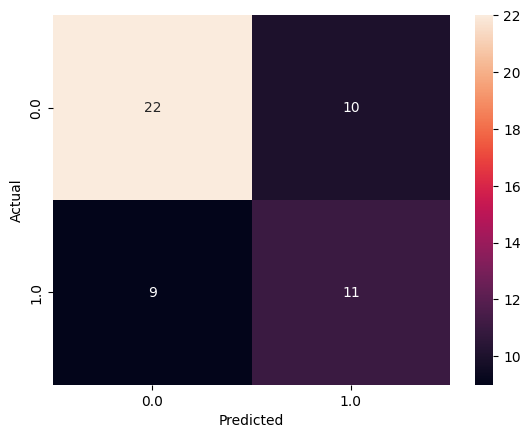

In [128]:
def plot_confusion_matrix(y, y_pred):
    data = {'y': y_test, 'y_pred': y_pred}
    df = pd.DataFrame(data, columns=['y','y_pred'])
    cm = pd.crosstab(df['y'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(cm, annot=True)

plot_confusion_matrix(y_test,y_pred_over_test)

> What are the conclusions? (1-2 paragraphs)

A matriz de confusão foi plotada com base no modelo com _oversampling_. 

A partir da análise dessa figura, vê-se que o modelo tem uma maior capacidade de acertar os resultados negativos do que os positivos. Enquanto para resultados positivos o modelo acertou em 11 das vezes e errou 9, para resultados negativos o modelo acertou em 22 das vezes errando também apenas em 10. Em geral, trazendo a acurácia do modelo para 63% para o conjunto de teste.

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**